In [46]:
from d2l_common import add_to_class,Module,ProgressBoard
from torch import nn
import torch
import numpy as np
import torch.nn.functional as F

In [86]:
class LinearRegression(Module):
    def __init__(self, lr):
        super().__init__()
        self.lr = lr
        self.net = nn.Linear(2, 1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)
        self.sigma = 1.0

    def forward(self, X):
        y = self.net(X)
        return y

    def loss(self, y_hat, y):
        # # nn.SmoothL1Loss
        residual = (y_hat-y).abs()
        condition = residual < self.sigma
        loss = torch.where(condition, 0.5*self.sigma *
                           residual**2, residual-self.sigma/2)
        return loss.sum()
        # return F.mse_loss(y_hat, y)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

In [87]:
# y = torch.matmul(X,w.re)
# def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,
#                 batch_size=32):
#     super().__init__()
#     self.save_hyperparameters()
#     n = num_train + num_val
#     self.X = torch.randn(n, len(w))
#     noise = torch.randn(n, 1) * noise
#     self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

# def get_dataloader(self, train):
#     i = slice(0, self.num_train) if train else slice(self.num_train, None)
#     return self.get_tensorloader((self.X, self.y), train, i)

torch.randn(100, len([2,-3.4])).shape

w=torch.tensor([2,-3.4])
b=4.2
n=100
X = torch.randn(n, len(w))
noise = (torch.randn(n,1)*0.01)
y = (X@w.view(-1,1)+b+noise)

# def get_tensorloader(self, tensors, train, indices=(0, None)):
#     tensors = tuple(a[indices] for a in tensors)
#     dataset = torch.utils.data.TensorDataset(*tensors)
#     return torch.utils.data.DataLoader(dataset, self.batch_size, shuffle=train)
t = tuple(a[slice(0,100)] for a in (X,y))
dataset = torch.utils.data.TensorDataset(*t)
for batch in torch.utils.data.DataLoader(dataset, 32, shuffle=True):
    print(batch[0].shape,batch[1].shape)
    print(*batch[0])


torch.Size([32, 2]) torch.Size([32, 1])
tensor([-1.3173,  0.5457]) tensor([-1.4565,  1.8137]) tensor([ 0.5466, -0.5194]) tensor([-0.2609, -0.2287]) tensor([0.1423, 0.2001]) tensor([ 0.9492, -0.0277]) tensor([ 1.2360, -1.0603]) tensor([ 1.2229, -0.3529]) tensor([ 1.2887, -0.2896]) tensor([-2.0713,  0.8622]) tensor([-0.6665,  0.3791]) tensor([-0.6976,  0.2986]) tensor([0.0277, 1.4905]) tensor([1.1751, 0.1751]) tensor([0.4051, 1.2194]) tensor([-0.4605, -1.2108]) tensor([-1.1431, -0.1549]) tensor([ 0.3618, -0.5663]) tensor([0.4729, 0.4200]) tensor([-2.3819, -0.5607]) tensor([-1.1070, -1.1854]) tensor([-0.6045, -2.1383]) tensor([0.4879, 0.7017]) tensor([-0.6552, -0.9716]) tensor([-1.0635,  0.8125]) tensor([ 0.6806, -0.9741]) tensor([-1.9213, -1.7829]) tensor([0.3092, 0.6700]) tensor([-0.5002, -0.1942]) tensor([0.7381, 1.8201]) tensor([-0.1937, -0.9159]) tensor([-0.7736,  0.0921])
torch.Size([32, 2]) torch.Size([32, 1])
tensor([-0.0702,  2.2225]) tensor([-1.2903, -0.8651]) tensor([-0.7415,  

In [88]:
y_hat = torch.randn(10, 1)
y = torch.randn(10, 1)
n = y_hat.shape[0]
torch.sum(1/n*(y_hat-y)*(y_hat-y))
# torch.sum(y_hat-y),torch.abs(y_hat-y)

# y = torch.randn(10, 1)  # 真实值，10个样本，每个样本有1个特征
# y_pred = torch.randn(10, 1)  # 模型预测值，10个样本，每个样本有1个特征

# criterion = nn.MSELoss()  # 创建MSE损失函数
# loss = criterion(y_pred, y)  # 计算MSE损失

# print(loss.item())  # 打印MSE损失值
# torch.tensor([10]).shape
torch.Tensor([1,2,3]).sum()

tensor(6.)

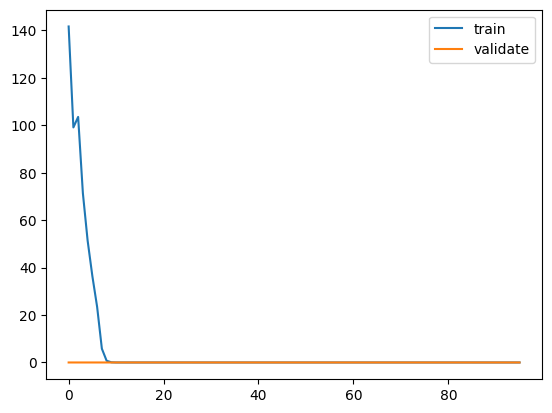

In [89]:
model = LinearRegression(lr=0.03)
from d2l_common import SyntheticRegressionData,Trainer
data = SyntheticRegressionData(w=torch.tensor([2,-3.4]),b=4.2)
trainer = Trainer(max_epochs=3)
trainer.fit(model, data)
model.plot()

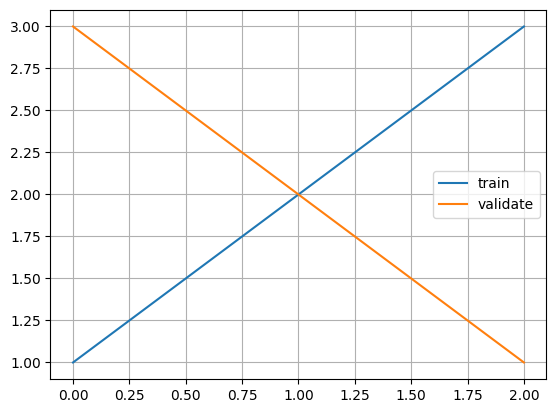

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.array([1,2,3]), label='train')
plt.plot(np.array([3,2,1]), label='validate')
plt.xlabel = 'epoch'
plt.ylabel = 'loss'
plt.legend()
plt.grid()
# plt.show()